**Name: Prithvi Vadlamani**

---



**CWID: 10476457**


---

**email Address: pvadlam1@stevens.edu**

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
np.amax(x_train)


255

In [ ]:
x_train = x_train/255 #scaling
x_test = x_test/255 # scaling

In [ ]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
y_train.shape
Y_train.shape

(60000, 10)

In [ ]:
x_train = x_train.flatten().reshape(60000, 28*28)
x_test = x_test.flatten().reshape(10000, 28*28)

Logistic Regression

In [ ]:
log_reg = LogisticRegression(penalty = 'l2', solver = 'saga')

In [ ]:
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(solver='saga')

In [ ]:
accuracy = log_reg.score(x_test, y_test)
accuracy

0.9261

Neural Networks

In [ ]:
model = Sequential()
model.add(Dense(500, input_dim = 784, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 500)               392500    
                                                                 
 dense_13 (Dense)            (None, 500)               250500    
                                                                 
 dense_14 (Dense)            (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'sgd', metrics = 'accuracy')

In [ ]:
hist = model.fit(x_train, Y_train, validation_data = (x_test, Y_test), epochs=250, batch_size = 16)

Epoch 1/250
3750/3750 [==============================] - 13s 3ms/step - loss: 0.4276 - accuracy: 0.8861 - val_loss: 0.2367 - val_accuracy: 0.9321
Epoch 2/250
3750/3750 [==============================] - 10s 3ms/step - loss: 0.2107 - accuracy: 0.9394 - val_loss: 0.1728 - val_accuracy: 0.9493
Epoch 3/250
3750/3750 [==============================] - 10s 3ms/step - loss: 0.1590 - accuracy: 0.9538 - val_loss: 0.1444 - val_accuracy: 0.9590
Epoch 4/250
3750/3750 [==============================] - 10s 3ms/step - loss: 0.1278 - accuracy: 0.9636 - val_loss: 0.1214 - val_accuracy: 0.9646
Epoch 5/250
3750/3750 [==============================] - 10s 3ms/step - loss: 0.1058 - accuracy: 0.9698 - val_loss: 0.1068 - val_accuracy: 0.9682
Epoch 6/250
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0896 - accuracy: 0.9747 - val_loss: 0.1018 - val_accuracy: 0.9694
Epoch 7/250
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0774 - accuracy: 0.9779 - val_loss: 0.0899 -

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


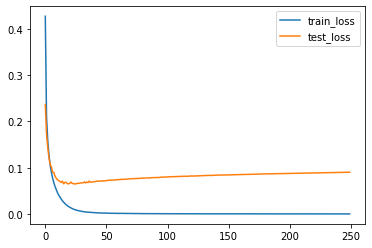

In [ ]:
plt.figure()
plt.plot(hist.history["loss"], label="train_loss")
plt.plot(hist.history["val_loss"], label="test_loss")
plt.legend()
plt.show()

Neural Networks with L2 and Dropout

In [ ]:
model_l2 = Sequential()
model_l2.add(Dropout(0.2))
model_l2.add(Dense(500, input_dim = 784, kernel_regularizer = l2(0.01), activation = 'relu'))
model_l2.add(Dense(500, activation = 'relu'))
model_l2.add(Dense(10, activation = 'sigmoid'))


In [ ]:
model_l2.compile(loss= 'categorical_crossentropy', optimizer = 'sgd', metrics = 'accuracy')

In [ ]:
hist_l2 = model_l2.fit(x_train, Y_train, validation_data = (x_test, Y_test), epochs=250, batch_size = 16)

Epoch 1/250
3750/3750 [==============================] - 12s 3ms/step - loss: 3.7258 - accuracy: 0.8634 - val_loss: 1.7024 - val_accuracy: 0.9275
Epoch 2/250
3750/3750 [==============================] - 10s 3ms/step - loss: 1.0635 - accuracy: 0.9208 - val_loss: 0.5997 - val_accuracy: 0.9386
Epoch 3/250
3750/3750 [==============================] - 11s 3ms/step - loss: 0.4654 - accuracy: 0.9363 - val_loss: 0.3187 - val_accuracy: 0.9537
Epoch 4/250
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3119 - accuracy: 0.9449 - val_loss: 0.2527 - val_accuracy: 0.9570
Epoch 5/250
3750/3750 [==============================] - 10s 3ms/step - loss: 0.2664 - accuracy: 0.9496 - val_loss: 0.2217 - val_accuracy: 0.9609
Epoch 6/250
3750/3750 [==============================] - 10s 3ms/step - loss: 0.2438 - accuracy: 0.9542 - val_loss: 0.2135 - val_accuracy: 0.9610
Epoch 7/250
3750/3750 [==============================] - 10s 3ms/step - loss: 0.2330 - accuracy: 0.9559 - val_loss: 0.2053 -

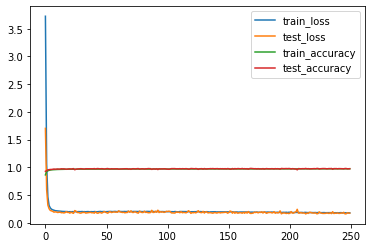

In [ ]:
plt.figure()
plt.plot(hist_l2.history["loss"], label="train_loss")
plt.plot(hist_l2.history["val_loss"], label="test_loss")
plt.plot(hist_l2.history["accuracy"],label = "train_accuracy")
plt.plot(hist_l2.history["val_accuracy"],label = 'test_accuracy')
plt.legend()
plt.show()

**Conclusion:**


---



*   The accuracy for Logistic Regression: 92.61%
*   The accuracy for Neural Networks: 99.95%
*   The accuracy for Neural Networks with L2 Regularization and DropOut: 97.24%
